In [2]:
#5.1.1 Introduction to Statistical Learing


#5.1.2generatingg Example Regression data

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


14.80142786070299

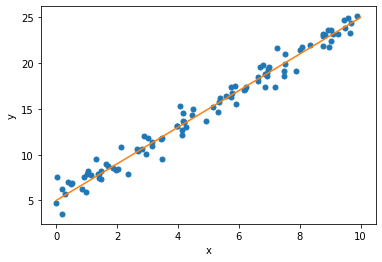

In [3]:
n=100
beta_0=5
beta_1=2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")
np.mean(x)
np.mean(y)

In [4]:
#5.1.3  Simple Linear Regression
#inbetween exercise to get the value of rss
def compute_rss(y_estimate, y):
    
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [5]:
rss

81.540007425512

In [6]:
#5.1.4 least squares estimation in code

Estimate foe the slope:  1.9999999999997442


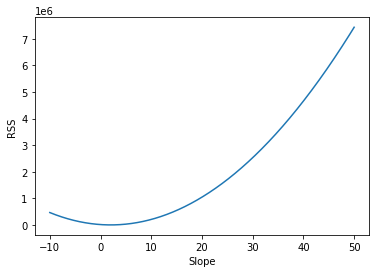

In [7]:
rss=[]
slopes=np.arange(-10,50, 0.01)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope*x)**2))
    
ind_min=np.argmin(rss)
print("Estimate foe the slope: ", slopes[ind_min])
plt.figure()
plt.plot(slopes,rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

Estimate foe the slope:  2.003999999993347


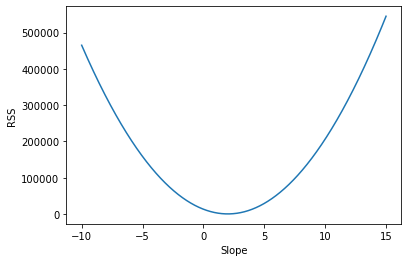

In [8]:
#internal exercise
rss=[]
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope*x)**2))
    
ind_min=np.argmin(rss)
print("Estimate foe the slope: ", slopes[ind_min])
plt.figure()
plt.plot(slopes,rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

In [9]:
#5.1.5 Simple linear regression in Code

import statsmodels.api as sm
mod=sm.OLS(y, x)
est =mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                    1.14e-75
Time:                        10:26:55   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
X=sm.add_constant(x)

In [11]:
mod=sm.OLS(y, X)
est=mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           7.47e-82
Time:                        10:26:55   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

In [12]:
#5.1.6 Multiple linear Regression

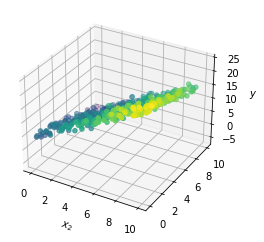

In [19]:
#5.1.7 scikit-lern for Linear Regression
n=500
beta_0= 5
beta_1= 2
beta_2= -1

np.random.seed(1)
x_1=10*ss.uniform.rvs(size=n)
x_2=10*ss.uniform.rvs(size=n)

y=beta_0+beta_1*x_1+beta_2*x_2+ss.norm.rvs(loc=0,scale=1,size=n)

X=np.stack([x_1,x_2], axis=1)

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_xlabel("$x_2$")
ax.set_zlabel("$y$");

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression()

In [24]:
lm.intercept_

5.154077763777254

In [35]:
lm.coef_

array([ 1.9999379 , -1.02026449])

In [30]:
X_0= np.array([2,4])

In [32]:
lm.predict(X_0)

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
lm.predict(X_0.reshape(1, -1))

array([5.07289561])

In [34]:
lm.score(X, y)

0.9798997316600129

In [39]:
#5.1.8 Assessing Model Accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.5,random_state=1)

lm=LinearRegression(fit_intercept=True,n_jobs=1)
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.9794930834681773